# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math, random
import seaborn as sns
from datetime import datetime
import datetime as dt
import yfinance as yf
import preprocessor as p
import re
from alpha_vantage.timeseries import TimeSeries
from sklearn.metrics import mean_squared_error


plt.style.use('ggplot')
sns.set_style('whitegrid')

%matplotlib inline


# Getting Data from yFinance  

In [2]:
def get_historical(quote):
        end = datetime.now()
        start = datetime(end.year-3,end.month,end.day)
        data = yf.download(quote, start=start, end=end)
        df = pd.DataFrame(data=data)
        df.to_csv(''+quote+'.csv')
        if(df.empty):
            ts = TimeSeries(key='N6A6QT6IBFJOPJ70',output_format='pandas')
            data, meta_data = ts.get_daily_adjusted(symbol='NSE:'+quote, outputsize='full')
            #Format df
            #Last 2 yrs rows => 502, in ascending order => ::-1
            data=data.head(503).iloc[::-1]
            data=data.reset_index()
            #Keep Required cols only
            df=pd.DataFrame()
            df['Date']=data['date']
            df['Open']=data['1. open']
            df['High']=data['2. high']
            df['Low']=data['3. low']
            df['Close']=data['4. close']
            df['Adj Close']=data['5. adjusted close']
            df['Volume']=data['6. volume']
            df.to_csv(''+quote+'.csv',index=False)
        return

In [3]:
# Company's Sticker 
quote = 'TATASTEEL.NS'
get_historical(quote)

[*********************100%***********************]  1 of 1 completed


In [4]:
df = pd.read_csv(''+quote+'.csv')
print("##############################################################################")
print("Today's",quote,"Stock Data: ")
today_stock=df.iloc[-1:]
print(today_stock)
print("##############################################################################")
df = df.dropna()
code_list=[]
for i in range(0,len(df)):
    code_list.append(quote)
df2=pd.DataFrame(code_list,columns=['Code'])
df2 = pd.concat([df2, df], axis=1)
df=df2


##############################################################################
Today's TATASTEEL.NS Stock Data: 
           Date        Open        High         Low       Close   Adj Close  \
745  2023-03-27  102.550003  103.400002  102.150002  102.550003  102.550003   

       Volume  
745  11045361  
##############################################################################


# Analysing Data

In [5]:
df

,Code,Date,Open,High,Low,Close,Adj Close,Volume
0,TATASTEEL.NS,2020-03-27,29.100000,29.525000,27.420000,27.725000,11.749861,111835940
1,TATASTEEL.NS,2020-03-30,26.700001,27.075001,25.084999,25.405001,10.766644,158537210
2,TATASTEEL.NS,2020-03-31,26.225000,27.245001,25.969999,26.959999,11.425653,157868130
3,TATASTEEL.NS,2020-04-01,26.600000,26.795000,25.809999,26.635000,11.287918,119647990
4,TATASTEEL.NS,2020-04-03,26.770000,26.889999,25.100000,25.375000,10.753930,125266950
...,...,...,...,...,...,...,...,...
741,TATASTEEL.NS,2023-03-21,105.099998,105.400002,104.300003,104.750000,104.750000,26434897
742,TATASTEEL.NS,2023-03-22,104.750000,105.949997,104.400002,104.800003,104.800003,25891259
743,TATASTEEL.NS,2023-03-23,104.400002,105.500000,104.349998,104.900002,104.900002,20913844
744,TATASTEEL.NS,2023-03-24,105.000000,105.050003,101.550003,102.099998,102.099998,39014278


In [6]:
# Summary Stats
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,746.000000,746.000000,746.000000,746.000000,746.000000,7.460000e+02
mean,92.018264,93.394397,90.474826,91.874491,55.904970,1.222193e+08
std,35.676245,36.053430,35.101206,35.535143,33.650455,8.572827e+07
min,26.225000,26.795000,25.084999,25.375000,10.753930,6.744340e+06
25%,62.870001,63.908750,62.173750,63.148750,27.456140,6.120162e+07
50%,106.199997,107.474998,104.699997,105.849998,51.837112,9.866268e+07
75%,117.612501,119.671249,115.888752,117.741251,86.765003,1.581985e+08
max,151.940002,153.449997,149.175003,151.940002,123.550003,6.428460e+08


In [7]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Code       746 non-null    object 
 1   Date       746 non-null    object 
 2   Open       746 non-null    float64
 3   High       746 non-null    float64
 4   Low        746 non-null    float64
 5   Close      746 non-null    float64
 6   Adj Close  746 non-null    float64
 7   Volume     746 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 46.8+ KB


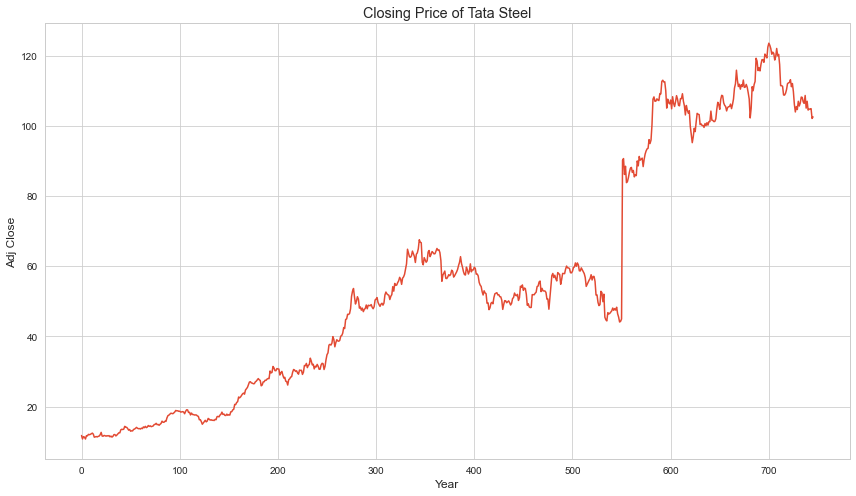

In [8]:
# Let's see a historical view of the closing price
plt.figure(figsize=(12, 7))

df['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel('Year')
plt.title("Closing Price of Tata Steel")
    
plt.tight_layout()

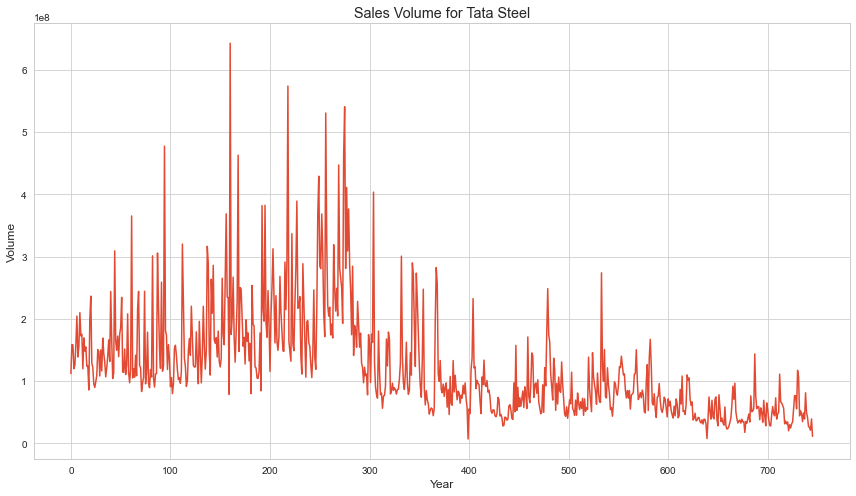

In [9]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 7))


df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel('Year')
plt.title("Sales Volume for Tata Steel")
    
plt.tight_layout()

<Figure size 864x504 with 0 Axes>

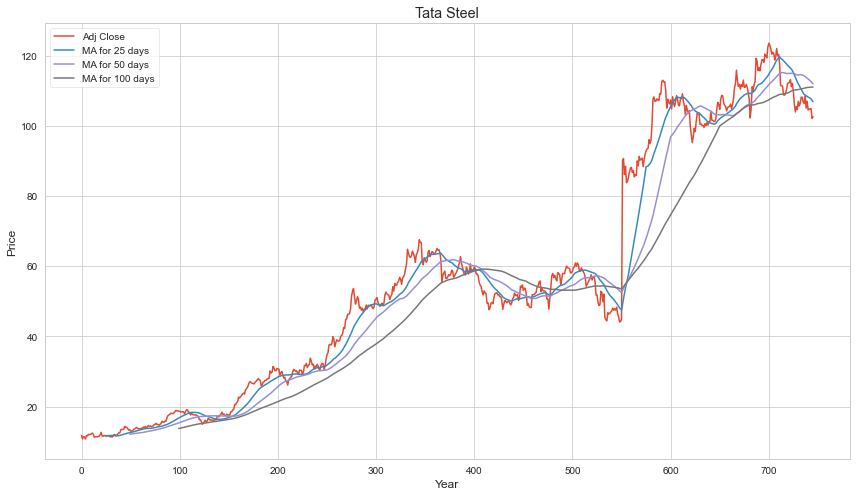

In [10]:
plt.figure(figsize=(12, 7))
ma_day = [25, 50, 100]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Adj Close'].rolling(ma).mean()

df[['Adj Close', 'MA for 25 days', 'MA for 50 days', 'MA for 100 days']].plot()
plt.ylabel('Price')
plt.xlabel('Year')
plt.title("Tata Steel")

plt.gcf().set_size_inches(12, 7)

plt.tight_layout()

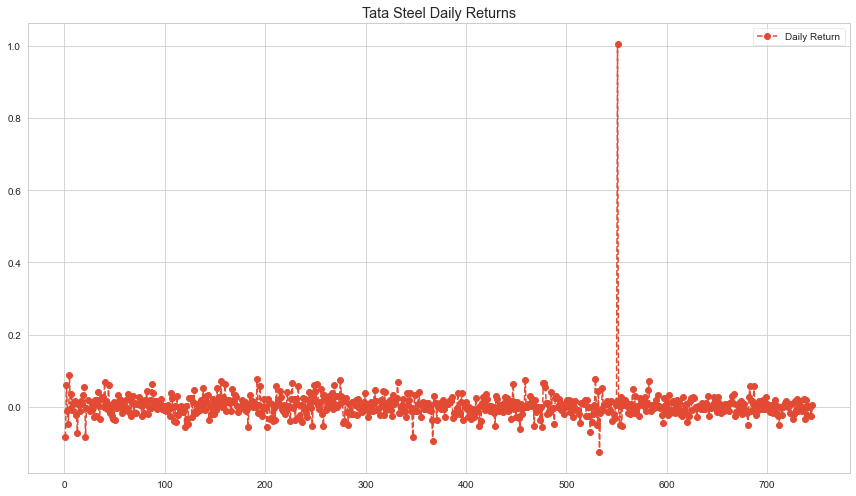

In [11]:
df['Daily Return'] = df['Adj Close'].pct_change()

plt.figure(figsize=(12, 7))
df['Daily Return'].plot(legend=True, linestyle='--', marker='o').set_title('Tata Steel Daily Returns')

plt.tight_layout()

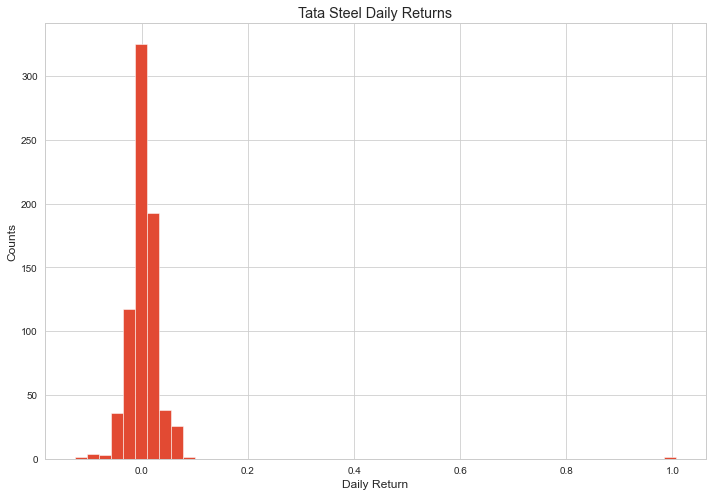

In [12]:
plt.figure(figsize=(10, 7))

df['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('Tata Steel Daily Returns')
    
plt.tight_layout()

Text(50, 50, 'Tata Steel')

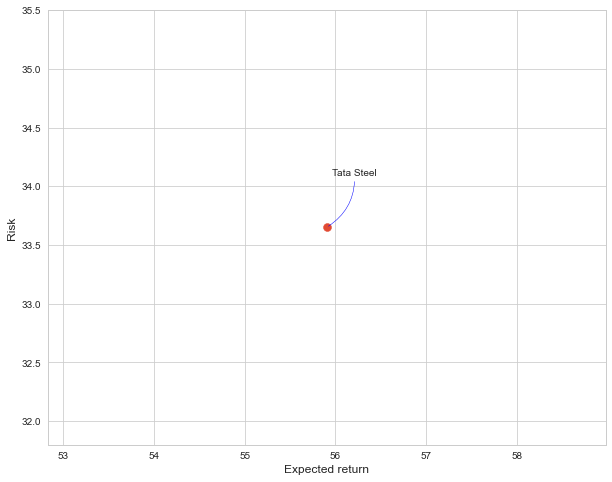

In [13]:
# Value at Risk

area = np.pi * 20
rets = df["Adj Close"]

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')


plt.annotate('Tata Steel', xy=(rets.mean(), rets.std()), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
             arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

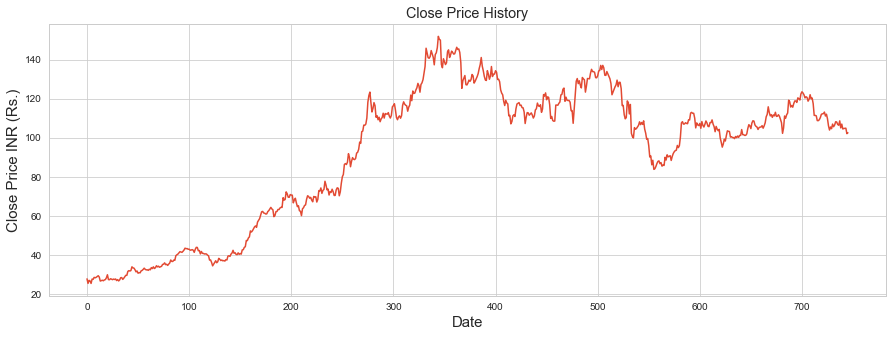

In [14]:
plt.figure(figsize=(15,5))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price INR (Rs.)', fontsize=15)
plt.show()

# Preprocessing Data for the Model

In [15]:
df = df.drop(['MA for 25 days', 'MA for 50 days', 'MA for 100 days', 'Daily Return'], axis=1)
df

,Code,Date,Open,High,Low,Close,Adj Close,Volume
0,TATASTEEL.NS,2020-03-27,29.100000,29.525000,27.420000,27.725000,11.749861,111835940
1,TATASTEEL.NS,2020-03-30,26.700001,27.075001,25.084999,25.405001,10.766644,158537210
2,TATASTEEL.NS,2020-03-31,26.225000,27.245001,25.969999,26.959999,11.425653,157868130
3,TATASTEEL.NS,2020-04-01,26.600000,26.795000,25.809999,26.635000,11.287918,119647990
4,TATASTEEL.NS,2020-04-03,26.770000,26.889999,25.100000,25.375000,10.753930,125266950
...,...,...,...,...,...,...,...,...
741,TATASTEEL.NS,2023-03-21,105.099998,105.400002,104.300003,104.750000,104.750000,26434897
742,TATASTEEL.NS,2023-03-22,104.750000,105.949997,104.400002,104.800003,104.800003,25891259
743,TATASTEEL.NS,2023-03-23,104.400002,105.500000,104.349998,104.900002,104.900002,20913844
744,TATASTEEL.NS,2023-03-24,105.000000,105.050003,101.550003,102.099998,102.099998,39014278


In [16]:
#Split data into training set and test set
dataset_train=df.iloc[0:int(0.8*len(df)),:]
dataset_test=df.iloc[int(0.8*len(df)):,:]
############# NOTE #################
#TO PREDICT STOCK PRICES OF NEXT N DAYS, STORE PREVIOUS N DAYS IN MEMORY WHILE TRAINING
# HERE N=7
###dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
training_set=df.iloc[:,5:6].values# 1:2, to store as numpy array else Series obj will be stored
#select cols using above manner to select as float64 type, view in var explorer

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))#Scaled values btween 0,1
training_set_scaled=sc.fit_transform(training_set)
#In scaling, fit_transform for training, transform for test
        
#Creating data stucture with 7 timesteps and 1 output. 
#7 timesteps meaning storing trends from 7 days before current day to predict 1 next output
X_train=[]#memory with 7 days from day i
y_train=[]#day i
for i in range(14,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-14:i,0])
    y_train.append(training_set_scaled[i,0])
#Convert list to numpy arrays
X_train=np.array(X_train)
y_train=np.array(y_train)
X_forecast=np.array(X_train[-1,1:])
X_forecast=np.append(X_forecast,y_train[-1])
#Reshaping: Adding 3rd dimension
X_train=np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))#.shape 0=row,1=col
X_forecast=np.reshape(X_forecast, (1,X_forecast.shape[0],1))
#For X_train=np.reshape(no. of rows/samples, timesteps, no. of cols/features)

X_train

array([[[1.85675371e-02],
        [2.37037776e-04],
        [1.25232019e-02],
        ...,
        [3.12882630e-02],
        [2.57970160e-02],
        [9.63931016e-03]],

       [[2.37037776e-04],
        [1.25232019e-02],
        [9.95536052e-03],
        ...,
        [2.57970160e-02],
        [9.63931016e-03],
        [1.15355671e-02]],

       [[1.25232019e-02],
        [9.95536052e-03],
        [0.00000000e+00],
        ...,
        [9.63931016e-03],
        [1.15355671e-02],
        [1.30762901e-02]],

       ...,

       [[6.26357998e-01],
        [6.44925520e-01],
        [6.34259076e-01],
        ...,
        [6.25172824e-01],
        [6.27148094e-01],
        [6.27543172e-01]],

       [[6.44925520e-01],
        [6.34259076e-01],
        [6.40974981e-01],
        ...,
        [6.27148094e-01],
        [6.27543172e-01],
        [6.28333267e-01]],

       [[6.34259076e-01],
        [6.40974981e-01],
        [6.54406790e-01],
        ...,
        [6.27543172e-01],
        [6.2833

In [17]:
print('X_train Shape',X_train.shape)
print('X_forecast Shape',X_forecast.shape)

X_train Shape (732, 14, 1)
X_forecast Shape (1, 14, 1)


# Building the Neural Network

In [18]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed, GRU
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

In [19]:
#Initialise RNN
regressor = tf.keras.Sequential()

#Add first LSTM layer
regressor.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
#units=no. of neurons in layer
#input_shape=(timesteps,no. of cols/features)
#return_seq=True for sending recc memory. For last layer, retrun_seq=False since end of the line
regressor.add(Dropout(0.1))
        
#Add 2nd LSTM layer
regressor.add(GRU(units=50,return_sequences=True))
regressor.add(Dropout(0.1))
        
#Add 3rd LSTM layer
regressor.add(GRU(units=50,return_sequences=True))
regressor.add(Dropout(0.1))
        
#Add 4th LSTM layer
regressor.add(GRU(units=50))
regressor.add(Dropout(0.1))
        
#Add o/p layer
regressor.add(Dense(units=1))
        
#Compile
regressor.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
        
#Training
history = regressor.fit(X_train,y_train,epochs=60,batch_size=16 )
#For lstm, batch_size=power of 2

Epoch 1/60
46/46 [==============================] - 9s 31ms/step - loss: 0.0538 - mse: 0.0538 - mae: 0.1554
Epoch 2/60
46/46 [==============================] - 2s 36ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0516
Epoch 3/60
46/46 [==============================] - 1s 30ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0438
Epoch 4/60
46/46 [==============================] - 1s 30ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0428
Epoch 5/60
46/46 [==============================] - 1s 27ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0480
Epoch 6/60
46/46 [==============================] - 1s 27ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0432
Epoch 7/60
46/46 [==============================] - 1s 27ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0435
Epoch 8/60
46/46 [==============================] - 1s 28ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0396
Epoch 9/60
46/46 [==============================] - 1s 28ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0414
Epoch 10/60
46/46 [=========

In [20]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 14, 50)            7950      
                                                                 
 dropout (Dropout)           (None, 14, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 14, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 14, 50)            0         
                                                                 
 gru_2 (GRU)                 (None, 14, 50)            15300     
                                                                 
 dropout_2 (Dropout)         (None, 14, 50)            0         
                                                                 
 gru_3 (GRU)                 (None, 50)                1

# Testing the Neural Network

In [21]:
#Testing
###dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,5:6].values
        
#To predict, we need stock prices of 7 days before the test set
#So combine train and test set to get the entire data set
dataset_total=pd.concat((dataset_train['Close'],dataset_test['Close']),axis=0) 
testing_set=dataset_total[ len(dataset_total) -len(dataset_test) -14: ].values
testing_set=testing_set.reshape(-1,1)
#-1=till last row, (-1,1)=>(80,1). otherwise only (80,0)
        
#Feature scaling
testing_set=sc.transform(testing_set)
        
#Create data structure
X_test=[]
Y_test=[]
for i in range(14,len(testing_set)):
    X_test.append(testing_set[i-14:i,0])
    Y_test.append(testing_set[i,0])
    #Convert list to numpy arrays
X_test=np.array(X_test)
Y_test=np.array(Y_test)
#Reshaping: Adding 3rd dimension
X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

X_test

array([[[0.64966615],
        [0.65480187],
        [0.64492552],
        ...,
        [0.68838145],
        [0.68877653],
        [0.66902383]],

       [[0.65480187],
        [0.64492552],
        [0.6453206 ],
        ...,
        [0.68877653],
        [0.66902383],
        [0.62951844]],

       [[0.64492552],
        [0.6453206 ],
        [0.65045625],
        ...,
        [0.66902383],
        [0.62951844],
        [0.64966615]],

       ...,

       [[0.626358  ],
        [0.64492552],
        [0.63425908],
        ...,
        [0.62517282],
        [0.62714809],
        [0.62754317]],

       [[0.64492552],
        [0.63425908],
        [0.64097498],
        ...,
        [0.62714809],
        [0.62754317],
        [0.62833327]],

       [[0.63425908],
        [0.64097498],
        [0.65440679],
        ...,
        [0.62754317],
        [0.62833327],
        [0.60621022]]])

In [22]:
print('X_test Shape',X_test.shape)

X_test Shape (150, 14, 1)


5/5 [==============================] - 1s 11ms/step
MAE: 1.6480612691243481
Max Error: 7.255615234374986
RMSE: 2.1816806946096277
MAPE: 1.53 %


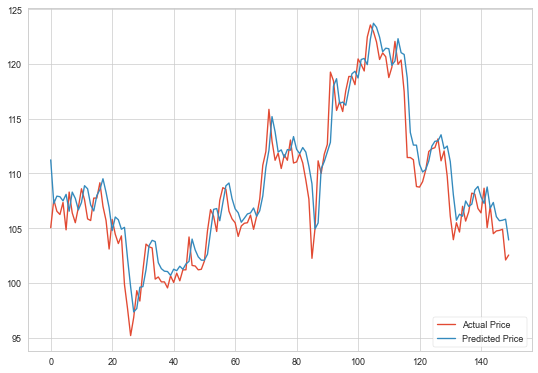

In [23]:
from sklearn.metrics import mean_absolute_error, max_error


#Testing Prediction
predicted_stock_price=regressor.predict(X_test)
        
#Getting original prices back from scaled values
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
fig = plt.figure(figsize=(10,7),dpi=65)
plt.plot(real_stock_price,label='Actual Price')  
plt.plot(predicted_stock_price,label='Predicted Price')
          
plt.legend(loc=4)

#Metrics

mae = mean_absolute_error(real_stock_price, predicted_stock_price)
print("MAE:", mae)

var2 = max_error(real_stock_price, predicted_stock_price)
print('Max Error:',var2)

rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))        
print("RMSE:",rmse)

mape = np.mean(np.abs(predicted_stock_price - real_stock_price)/np.abs(real_stock_price))
print("MAPE:",np.round(mape*100,2),'%')

In [24]:
print('Real Stock Price\tPredicted Stock Price')
for i in range(80,90):
    print(np.round(real_stock_price[i,0], 3),'\t\t\t', np.round(predicted_stock_price[i,0], 3))

Real Stock Price	Predicted Stock Price
111.05 			 112.202
111.8 			 111.804
110.95 			 112.363
109.4 			 111.949
107.65 			 110.648
102.25 			 109.049
105.0 			 104.936
111.15 			 105.479
110.0 			 110.44
111.75 			 111.079


In [25]:
real_stock_price.shape

(150, 1)

In [26]:
#Forecasting Prediction
forecasted_stock_price=regressor.predict(X_forecast)
        
#Getting original prices back from scaled values
forecasted_stock_price=sc.inverse_transform(forecasted_stock_price)
        
lstm_pred=forecasted_stock_price[0,0]
print()
print("##############################################################################")
print("Tomorrow's Closing Price Prediction by LSTM: ",lstm_pred)

print("##############################################################################")

1/1 [==============================] - 0s 30ms/step

##############################################################################
Tomorrow's Closing Price Prediction by LSTM:  103.48948
##############################################################################


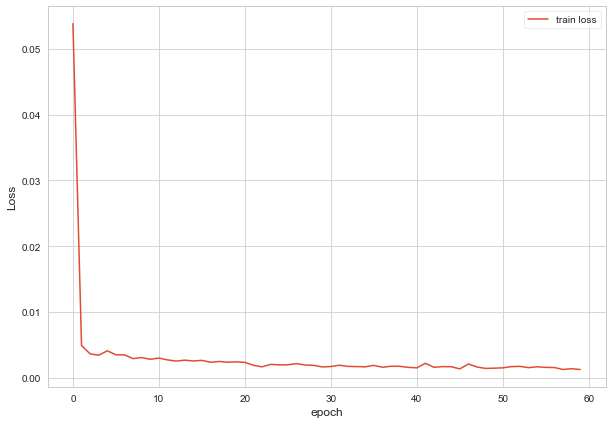

In [27]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='train loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

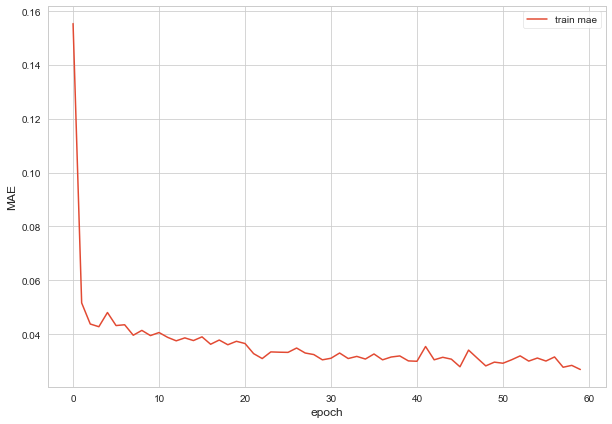

In [28]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['mae'], label='train mae')
plt.xlabel("epoch")
plt.ylabel("MAE")
plt.legend()

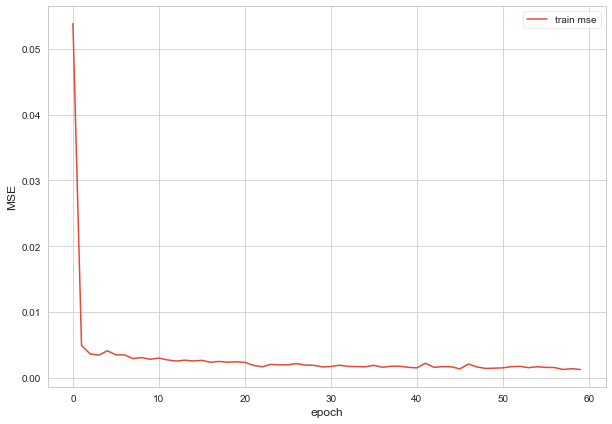

In [29]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['mse'], label='train mse')
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.legend()

# GAN Data

In [30]:
gan_df = pd.read_csv('Gan_Stock_Data.csv')
gan_df

,Open,High,Low,Close,Adj Close,Volume
0,30.998632,31.329346,30.036394,30.326565,13.680544,237548460
1,31.192781,31.524412,30.228290,30.515032,13.780007,239785900
2,31.317442,31.649899,30.351930,30.636353,13.842792,240958830
3,31.422297,31.756216,30.456335,30.739090,13.896593,242175680
4,31.455187,31.789467,30.489110,30.771267,13.912906,242393000
...,...,...,...,...,...,...
741,135.251820,138.000260,134.567030,134.817730,116.893684,35499730
742,135.235170,138.040760,134.699400,134.961260,117.741040,36515744
743,135.453050,138.205540,134.795840,135.066830,117.280000,35731244
744,135.370710,138.194820,134.900830,135.178760,118.172714,36952496


#  Preprocessing Data

In [31]:
from sklearn.preprocessing import MinMaxScaler

#Split data into training set and test set
gan_train=gan_df.iloc[0:int(0.8*len(df)),:]
gan_test=gan_df.iloc[int(0.8*len(df)):,:]
############# NOTE #################
#TO PREDICT STOCK PRICES OF NEXT N DAYS, STORE PREVIOUS N DAYS IN MEMORY WHILE TRAINING
# HERE N=7
###dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
gan_set=gan_df.iloc[:,3:4].values# 1:2, to store as numpy array else Series obj will be stored
#select cols using above manner to select as float64 type, view in var explorer

#Feature Scaling
gan_sc=MinMaxScaler(feature_range=(0,1))#Scaled values btween 0,1
gan_set_scaled=gan_sc.fit_transform(gan_set)
#In scaling, fit_transform for training, transform for test
        
#Creating data stucture with 7 timesteps and 1 output. 
#7 timesteps meaning storing trends from 7 days before current day to predict 1 next output
GanX_train=[]#memory with 7 days from day i
Gany_train=[]#day i
for i in range(14,len(gan_set_scaled)):
    GanX_train.append(gan_set_scaled[i-14:i,0])
    Gany_train.append(gan_set_scaled[i,0])
#Convert list to numpy arrays
GanX_train=np.array(GanX_train)
Gany_train=np.array(Gany_train)
GanX_forecast=np.array(GanX_train[-1,1:])
GanX_forecast=np.append(GanX_forecast,Gany_train[-1])
#Reshaping: Adding 3rd dimension
GanX_train=np.reshape(GanX_train, (GanX_train.shape[0],GanX_train.shape[1],1))#.shape 0=row,1=col
GanX_forecast=np.reshape(GanX_forecast, (1,GanX_forecast.shape[0],1))
#For X_train=np.reshape(no. of rows/samples, timesteps, no. of cols/features)

GanX_train

array([[[0.        ],
        [0.00179672],
        [0.00295332],
        ...,
        [0.02262545],
        [0.02240128],
        [0.02237539]],

       [[0.00179672],
        [0.00295332],
        [0.00393275],
        ...,
        [0.02240128],
        [0.02237539],
        [0.01993389]],

       [[0.00295332],
        [0.00393275],
        [0.00423951],
        ...,
        [0.02237539],
        [0.01993389],
        [0.0187835 ]],

       ...,

       [[0.99147183],
        [0.99149576],
        [0.9927167 ],
        ...,
        [0.99602373],
        [0.99615233],
        [0.99752066]],

       [[0.99149576],
        [0.9927167 ],
        [0.99302263],
        ...,
        [0.99615233],
        [0.99752066],
        [0.9985271 ]],

       [[0.9927167 ],
        [0.99302263],
        [0.9932049 ],
        ...,
        [0.99752066],
        [0.9985271 ],
        [0.99959416]]])

In [32]:
print('GanX_train Shape',GanX_train.shape)
print('GanX_forecast Shape',GanX_forecast.shape)

GanX_train Shape (732, 14, 1)
GanX_forecast Shape (1, 14, 1)


# Making Predictions

In [33]:
#Initialise RNN
regressor2 = tf.keras.Sequential()

#Add first LSTM layer
regressor2.add(GRU(units=50,return_sequences=True,input_shape=(GanX_train.shape[1],1)))
#units=no. of neurons in layer
#input_shape=(timesteps,no. of cols/features)
#return_seq=True for sending recc memory. For last layer, retrun_seq=False since end of the line
regressor2.add(Dropout(0.1))
        
#Add 2nd LSTM layer
regressor2.add(GRU(units=50,return_sequences=True))
regressor2.add(Dropout(0.1))
        
#Add 3rd LSTM layer
regressor2.add(GRU(units=50,return_sequences=True))
regressor2.add(Dropout(0.1))
        
#Add 4th LSTM layer
regressor2.add(GRU(units=50))
regressor2.add(Dropout(0.1))
        
#Add o/p layer
regressor2.add(Dense(units=1))
        
#Compile
regressor2.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
        
#Training
history2 = regressor2.fit(GanX_train,Gany_train,epochs=60,batch_size=16 )
#For lstm, batch_size=power of 2

Epoch 1/60
46/46 [==============================] - 9s 27ms/step - loss: 0.0276 - mse: 0.0276 - mae: 0.1096
Epoch 2/60
46/46 [==============================] - 1s 27ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0410
Epoch 3/60
46/46 [==============================] - 1s 27ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0399
Epoch 4/60
46/46 [==============================] - 1s 27ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0367
Epoch 5/60
46/46 [==============================] - 1s 30ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0366
Epoch 6/60
46/46 [==============================] - 1s 27ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0358
Epoch 7/60
46/46 [==============================] - 1s 27ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0387
Epoch 8/60
46/46 [==============================] - 1s 27ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0382
Epoch 9/60
46/46 [==============================] - 1s 27ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0373
Epoch 10/60
46/46 [=========

In [34]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 14, 50)            7950      
                                                                 
 dropout_4 (Dropout)         (None, 14, 50)            0         
                                                                 
 gru_5 (GRU)                 (None, 14, 50)            15300     
                                                                 
 dropout_5 (Dropout)         (None, 14, 50)            0         
                                                                 
 gru_6 (GRU)                 (None, 14, 50)            15300     
                                                                 
 dropout_6 (Dropout)         (None, 14, 50)            0         
                                                                 
 gru_7 (GRU)                 (None, 50)               

In [35]:
#Testing
###dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
Ganreal_stock_price=gan_test.iloc[:,3:4].values
        
#To predict, we need stock prices of 7 days before the test set
#So combine train and test set to get the entire data set
Gandataset_total=pd.concat((gan_train['Close'],gan_test['Close']),axis=0) 
Gantesting_set=Gandataset_total[ len(Gandataset_total) -len(gan_test) -14: ].values
Gantesting_set=Gantesting_set.reshape(-1,1)
#-1=till last row, (-1,1)=>(80,1). otherwise only (80,0)
        
#Feature scaling
Gantesting_set=gan_sc.transform(Gantesting_set)
        
#Create data structure
GanX_test=[]
GanY_test=[]
for i in range(14,len(Gantesting_set)):
    GanX_test.append(Gantesting_set[i-14:i,0])
    GanY_test.append(Gantesting_set[i,0])
    #Convert list to numpy arrays
GanX_test=np.array(GanX_test)
GanY_test=np.array(GanY_test)
#Reshaping: Adding 3rd dimension
GanX_test=np.reshape(GanX_test, (GanX_test.shape[0],GanX_test.shape[1],1))

GanX_test

array([[[0.88564515],
        [0.88633036],
        [0.88712615],
        ...,
        [0.90028387],
        [0.90156611],
        [0.90317277]],

       [[0.88633036],
        [0.88712615],
        [0.88746531],
        ...,
        [0.90156611],
        [0.90317277],
        [0.90453508]],

       [[0.88712615],
        [0.88746531],
        [0.88849796],
        ...,
        [0.90317277],
        [0.90453508],
        [0.90508525]],

       ...,

       [[0.99147183],
        [0.99149576],
        [0.9927167 ],
        ...,
        [0.99602373],
        [0.99615233],
        [0.99752066]],

       [[0.99149576],
        [0.9927167 ],
        [0.99302263],
        ...,
        [0.99615233],
        [0.99752066],
        [0.9985271 ]],

       [[0.9927167 ],
        [0.99302263],
        [0.9932049 ],
        ...,
        [0.99752066],
        [0.9985271 ],
        [0.99959416]]])

In [36]:
print('GanX_test Shape',GanX_test.shape)

GanX_test Shape (150, 14, 1)


# Testing

5/5 [==============================] - 2s 10ms/step
MAE: 1.1402582439355478
Max Error: 7.767864997558604
RMSE: 1.7209348233693176
MAPE: 0.89 %


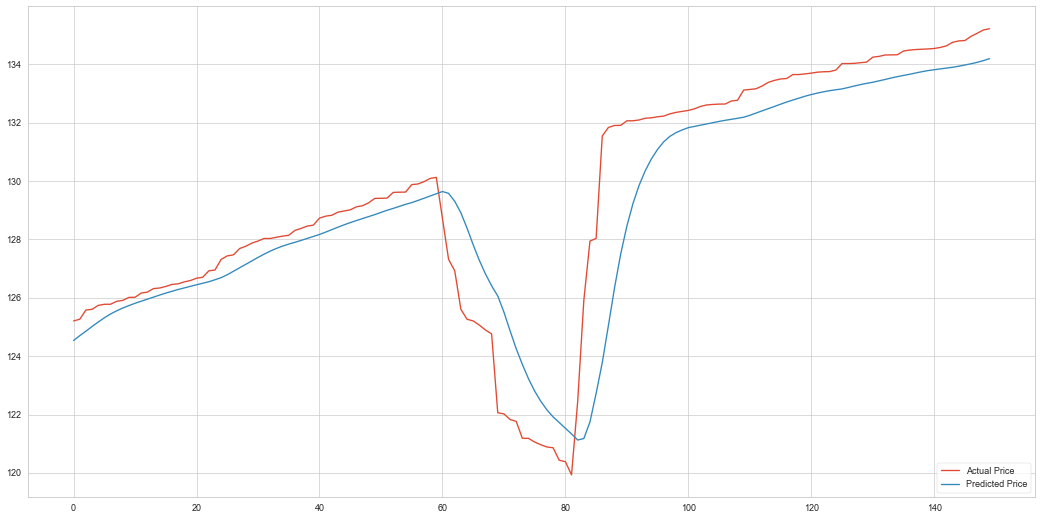

In [37]:
from sklearn.metrics import mean_absolute_error, max_error

#Testing Prediction
Gan_predictions = regressor2.predict(GanX_test)
        
#Getting original prices back from scaled values
Gan_predictions=gan_sc.inverse_transform(Gan_predictions)
fig = plt.figure(figsize=(20,10),dpi=65)
plt.plot(Ganreal_stock_price,label='Actual Price')  
plt.plot(Gan_predictions,label='Predicted Price')
          
plt.legend(loc=4)

#Metrics

Ganmae = mean_absolute_error(Ganreal_stock_price, Gan_predictions)
print("MAE:", Ganmae)

Ganvar2 = max_error(Ganreal_stock_price, Gan_predictions)
print('Max Error:',Ganvar2)

Ganrmse = math.sqrt(mean_squared_error(Ganreal_stock_price, Gan_predictions))        
print("RMSE:",Ganrmse)

Ganmape = np.mean(np.abs(Gan_predictions - Ganreal_stock_price)/np.abs(Ganreal_stock_price))
print("MAPE:",np.round(Ganmape*100,2),'%')